<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/4thWeek/Tugas_ML_4_Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

In [34]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/smt akhir/ml/flu.csv')

In [35]:
df.describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.471040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.000000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.000000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.000000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.000000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.000000,93.000000,36.070000,30.600000,37.000000,42.222222


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

In [37]:
# Mengisi missing values dengan median untuk numerik dan modus untuk kategorikal
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          1482 non-null   object 
 2   Age                          1482 non-null   float64
 3   Sex                          1482 non-null   object 
 4   neutrophil                   1482 non-null   float64
 5   serumLevelsOfWhiteBloodCell  1482 non-null   float64
 6   lymphocytes                  1482 non-null   float64
 7   CReactiveProteinLevels       1482 non-null   object 
 8   DurationOfIllness            1482 non-null   float64
 9   CTscanResults                1482 non-null   object 
 10  RiskFactors                  1482 non-null   object 
 11  GroundGlassOpacity           1482 non-null   object 
 12  Diarrhea                     1482 non-null   object 
 13  Fever             

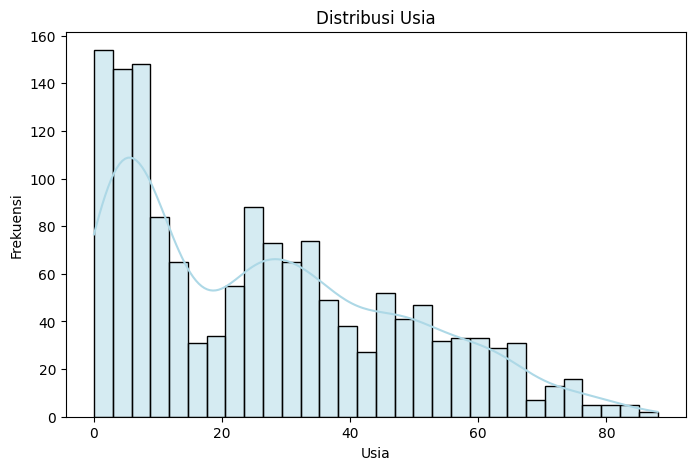

In [39]:
# Visualisasi distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="lightblue")
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

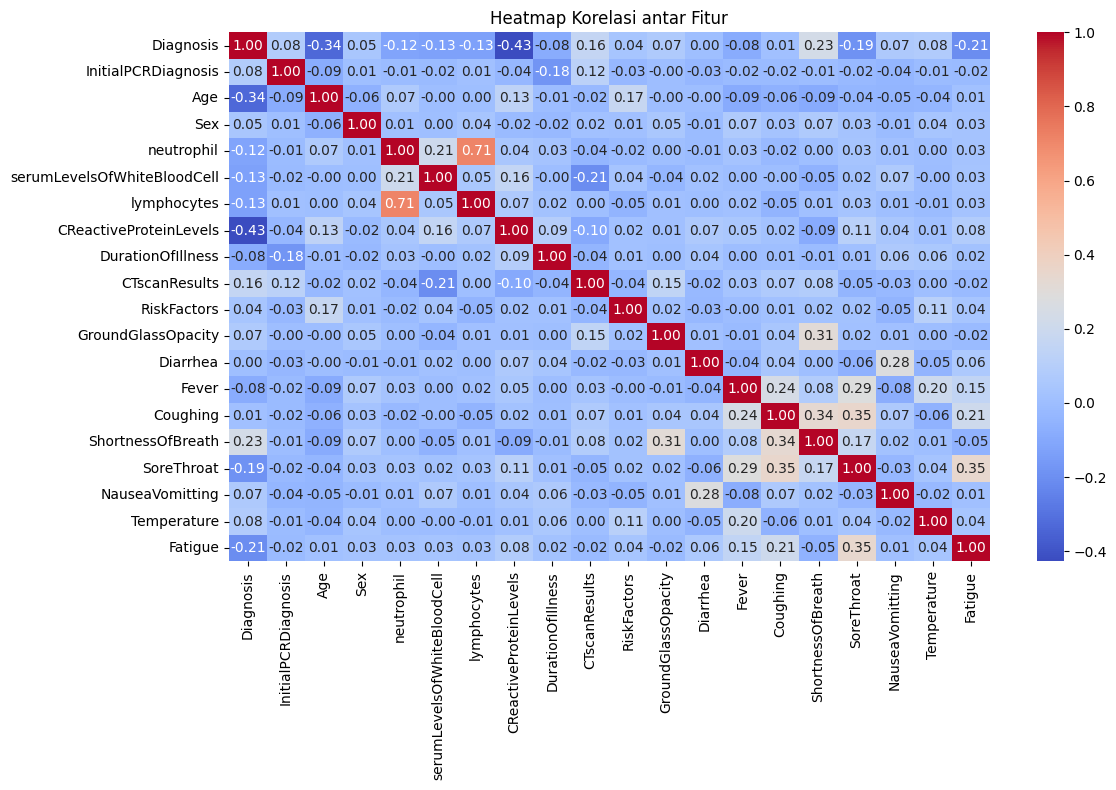

In [50]:
# Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi antar Fitur")
plt.tight_layout()
plt.show()

In [42]:
# Encoding fitur kategorikal
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [45]:
# Pisahkan fitur dan target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi dan probabilitas
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [47]:
# Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Cetak hasil evaluasi
print("=== EVALUASI MODEL ===")
print(f"Akurasi     : {acc:.3f}")
print(f"Presisi     : {prec:.3f}")
print(f"Recall      : {rec:.3f}")
print(f"F1 Score    : {f1:.3f}")
print(f"AUC         : {auc:.3f}")

=== EVALUASI MODEL ===
Akurasi     : 0.916
Presisi     : 0.925
Recall      : 0.957
F1 Score    : 0.941
AUC         : 0.912


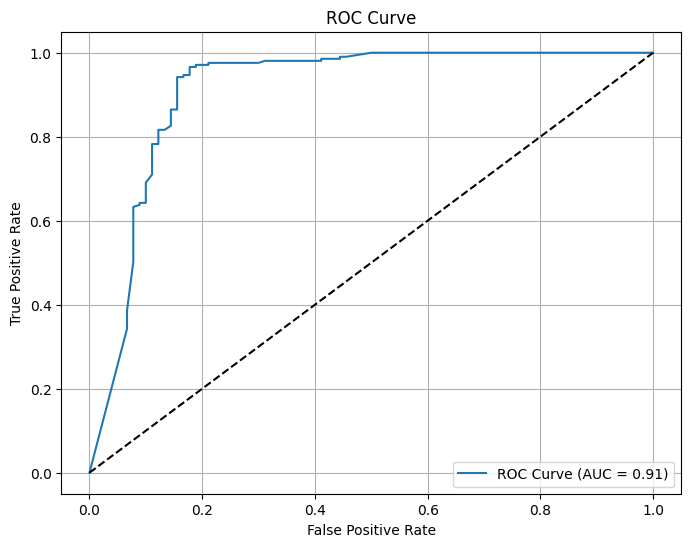

In [48]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### 📐 Accuracy
Accuracy = (TP + TN) / (TP + TN + FP + FN)

### 📐 Precision
Precision = TP / (TP + FP)

### 📐 Recall
Recall = TP / (TP + FN)

### 📐 F1 Score
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

### 📐 AUC (Area Under Curve)
AUC mengukur area di bawah kurva ROC. Nilai AUC mendekati 1 menunjukkan model sangat baik dalam membedakan kelas.
